In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import sklearn

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

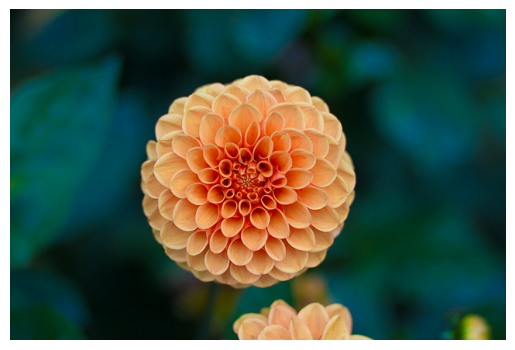

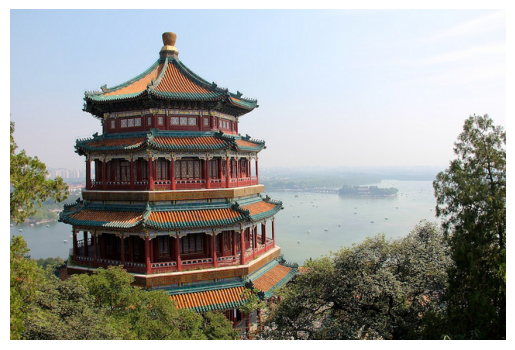

In [2]:
from sklearn.datasets import load_sample_image

flower = load_sample_image("flower.jpg") / 255.0
china = load_sample_image("china.jpg") / 255.0
X_samples = np.array([flower, china])

plt.imshow(flower)
plt.axis("off")
plt.show()

plt.imshow(china)
plt.axis("off")
plt.show()

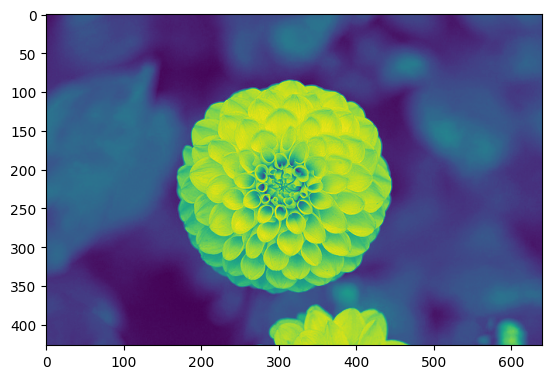

In [3]:
depthwise_maxpool = tf.nn.max_pool(flower,
                                   ksize=(1, 1, 3),
                                   strides=(1, 1, 3),
                                   padding="VALID")

plt.imshow(depthwise_maxpool)
plt.show()

In [4]:
print(flower.shape)
print(china.shape)
print(X_samples.shape)

(427, 640, 3)
(427, 640, 3)
(2, 427, 640, 3)


In [40]:
from sklearn.model_selection import train_test_split

(X, y), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = X[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

y = y[:, np.newaxis]
y_test = y_test[:, np.newaxis]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_classes = len(class_names)

val_share = len(y_test) / len(y)
(X_train, X_val, y_train, y_val) = train_test_split(X, y, test_size=val_share)

In [41]:
def plothistory(hist):
    pd.DataFrame(hist).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)  # vertical range: [0, 1]
    plt.show()

print(y_train)

[[4]
 [4]
 [9]
 ...
 [3]
 [6]
 [2]]


Full
(60000, 28, 28, 1)
(60000, 1)

Test
(10000, 28, 28, 1)
(10000, 1)

Train
(50000, 28, 28, 1)
(50000, 1)

Validation
(10000, 28, 28, 1)
(10000, 1)

Shirt


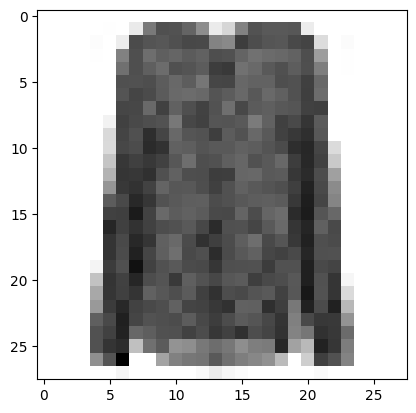

In [43]:
print("Full")
print(X.shape)
print(y.shape)

print()

print("Test")
print(X_test.shape)
print(y_test.shape)

print()

print("Train")
print(X_train.shape)
print(y_train.shape)

print()

print("Validation")
print(X_val.shape)
print(y_val.shape)

print()

ith = 3
print(class_names[y_train.ravel()[ith]])
plt.imshow(X_train[ith], cmap="binary")
plt.show()

In [73]:
tf.one_hot(y_val, num_classes, axis=1).shape

TensorShape([10000, 10, 1])

In [67]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, ReLU, PReLU, Dense, Dropout, Flatten, Reshape
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Nadam

model = Sequential([
    Input(shape=(28, 28, 1)), # only 1 channel because it's grayscale, not rgb
    
    # block 1: CONV
    Conv2D(filters=64, kernel_size=(5, 5), padding="same", kernel_initializer="he_uniform"),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2), padding="valid"),
    
    # block 2: CONV2
    Conv2D(128, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform"),
    ReLU(),
    Conv2D(128, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform"),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2), padding="valid"),
    
    # block 3: CONV2
    Conv2D(256, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform"),
    ReLU(),
    Conv2D(256, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform"),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2), padding="valid"),
    
    # Onto FC layers
    #Reshape((-1, 1)),
    Flatten(),
    
    # FC1
    Dense(128, kernel_initializer="he_uniform"),
    PReLU(),
    Dropout(rate=0.5),
    
    # FC2
    Dense(64, kernel_initializer="he_uniform"),
    ReLU(),
    Dropout(rate=0.5),
    
    # Softmax logits
    Dense(num_classes, kernel_initializer="he_uniform", activation="linear")
])

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Nadam(learning_rate=0.01))

history = model.fit(X_train, tf.one_hot(y_train.ravel(), num_classes),
                    validation_data=(X_val, tf.one_hot(y_val.ravel(), num_classes)),
                    epochs=10, batch_size=2)

plothistory(history)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(20,) and logits.shape=(2, 10)


In [69]:
# Transfer Learning
from tensorflow.keras.applications import resnet50

# Get the model
resnet50_model = resnet50.ResNet50(weights="imagenet")

In [ ]:
# First: resize image. Res-Net50 expects 224x224
resnet50_inputdims = [224, 224]
samples_resnet50 = tf.image.resize(X_samples, resnet50_inputdims)

# Preprocess input to be what Res-Net50 wants. Multiply by 255 since we divided earlier 
samples_resnet50 = resnet50.preprocess_input(china_resnet50 * 255)

# Prediction
y_probas = resnet50_model.predict(china_resnet50)

k = 5
top_k_probas = resnet50.decode_predictions(y_probas, top=5)

for class_id, name, y_proba in top_k_probas[0]:
    print(" {}, - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))

In [72]:
import tensorflow_datasets as tfds

# Flowers
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples # 3670
class_name = info.features["label"].names
n_classes = info.features["label"].num_classes # 5

ModuleNotFoundError: No module named 'tensorflow_datasets'